# Coordenadas de las ciudades

In [2]:
cities = [
    (1,3), (2,5), (2,7), (4,2), (4,4), 
    (4,7), (4,8), (5,3), (6,1), (6,6), 
    (7,8), (8,2), (8,7), (9,3), (10,7), 
    (11,1), (11,4), (11,6), (12,7), (13,5),
]

# Parámetros iniciales

In [3]:
from agente_viajero import AgenteViajero

av = AgenteViajero(cities, population_size=100, n_generations=100, tournament_size=0.07)

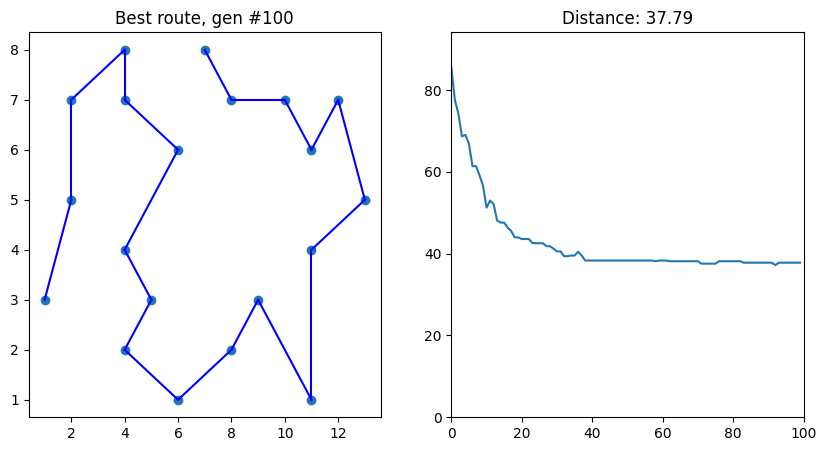

,top_cities,top_route,top_dist
0,"[16, 6, 13, 12, 7, 2, 0, 4, 1, 8, 5, 3, 9, 14,...","[(16, 6), (6, 13), (13, 12), (12, 7), (7, 2), ...",85.568686
1,"[18, 12, 15, 17, 9, 4, 0, 1, 3, 8, 11, 7, 13, ...","[(18, 12), (12, 15), (15, 17), (17, 9), (9, 4)...",77.592296
2,"[18, 12, 15, 17, 9, 4, 0, 1, 3, 8, 11, 7, 13, ...","[(18, 12), (12, 15), (15, 17), (17, 9), (9, 4)...",74.258321
3,"[18, 12, 15, 17, 13, 7, 11, 8, 3, 1, 0, 4, 9, ...","[(18, 12), (12, 15), (15, 17), (17, 13), (13, ...",68.696816
4,"[16, 6, 13, 12, 10, 5, 4, 1, 8, 11, 15, 18, 19...","[(16, 6), (6, 13), (13, 12), (12, 10), (10, 5)...",69.039110
...,...,...,...
95,"[0, 1, 2, 6, 5, 9, 4, 7, 3, 8, 11, 13, 15, 16,...","[(0, 1), (1, 2), (2, 6), (6, 5), (5, 9), (9, 4...",37.794611
96,"[0, 1, 2, 6, 5, 9, 4, 7, 3, 8, 11, 13, 15, 16,...","[(0, 1), (1, 2), (2, 6), (6, 5), (5, 9), (9, 4...",37.794611
97,"[0, 1, 2, 6, 5, 9, 4, 7, 3, 8, 11, 13, 15, 16,...","[(0, 1), (1, 2), (2, 6), (6, 5), (5, 9), (9, 4...",37.794611
98,"[0, 1, 2, 6, 5, 9, 4, 7, 3, 8, 11, 13, 15, 16,...","[(0, 1), (1, 2), (2, 6), (6, 5), (5, 9), (9, 4...",37.794611


In [4]:
av.train(reprod_functions=[av.inversion_reprod], verbose=False)
df = av.result.copy()
df

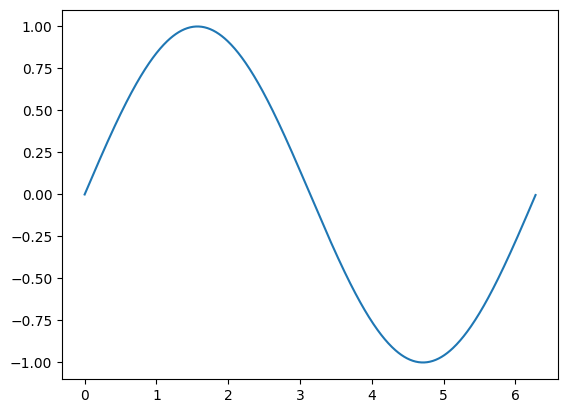

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)

plt.show()

/var/folders/1d/70wkwn397vn1g2rcpmnv36fc0000gn/T/ipykernel_57996/286961734.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/1d/70wkwn397vn1g2rcpmnv36fc0000gn/T/ipykernel_57996/286961734.py:67: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  new_fig.show()


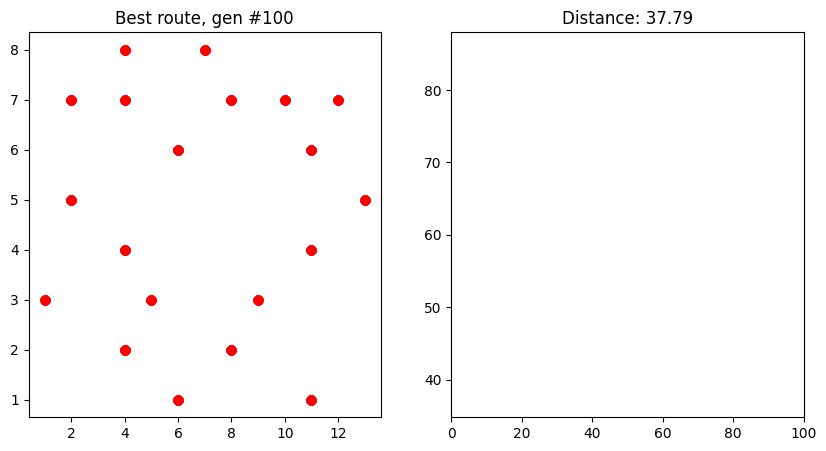

In [5]:
from matplotlib.pyplot import subplots, show
%matplotlib inline

class PlotCities:
    def set_plot_env(self, coord: list) -> None:
    # def set_plot_env(self) -> None:
        self.fig, self.axes = subplots(nrows=1, ncols=2, figsize=(10, 5))
        self.cit_x, self.cit_y = [*zip(*coord)]
        # self.cit_x, self.cit_y = [*zip(*self.cit_coor)]
        self.axes[1].set_xlim([0,100])
        # self.axes[1].set_xlim([0,self.n_gen])


    def plot_cities(self, **kwargs) -> None:
        self.axes[0].scatter(self.cit_x, self.cit_y, **kwargs)
        

    def connectpoints(self, point: tuple, **kwargs) -> None:
        x1, x2 = self.cit_x[point[0]], self.cit_x[point[-1]]
        y1, y2 = self.cit_y[point[0]], self.cit_y[point[-1]]
        self.axes[0].plot([x1, x2],[y1, y2], **kwargs)


    def plot_route(self, route: list, n_gen: int, **kwargs) -> None:
        for city in route:
            self.connectpoints(city, **kwargs)
        self.axes[0].set_title(f'Best route, gen #{n_gen}')


    def plot_distance(self, distance_history: list) -> None:
        self.axes[1].plot(distance_history)

        top_dist = list(distance_history)[-1]
        distance = f'Distance: {top_dist:.2f}'
        self.axes[1].set_title(distance)


    def plot_tsp(self, distance_history, **kwargs) -> None:
        self.plot_cities(c='red')
        self.plot_route(**kwargs)
        self.plot_distance(distance_history)
        return self.fig


    def delete_connection(self, prev_fig) -> None:
        all_lines = prev_fig.axes[0].lines
        len_lines = len(all_lines)
        # self.cit_len

        new_fig = prev_fig
        for _ in range(len_lines):
            new_fig.axes[0].lines[0].remove()
            
        new_fig.axes[1].lines[0].remove()
        return new_fig


    def animate_route(self, cit_coor: list, routes: list, distances: list, **kwargs) -> None:
    # def animate_route(self, routes: list, distances: list, **kwargs) -> None:
        self.set_plot_env(cit_coor)
        # self.set_plot_env()

        for i, route in enumerate(routes):
            fig = self.plot_tsp(distances[:i+1], route=route, n_gen=i+1, **kwargs)
            fig.show()
            new_fig = self.delete_connection(fig)
            new_fig.show()
            

pc = PlotCities()
# pc.set_plot_env(cities)

# N = 22
# fig = pc.plot_tsp(distance_history=df['top_dist'][:N], route=df['top_route'][N], n_gen=N, c='blue')
pc.animate_route(cities, routes=df['top_route'], distances=df['top_dist'], c='blue')

# Comparando métodos de reproducción

## Enroque

In [ ]:
av.train(reprod_functions=[av.castling_reprod], verbose=False)


## Inversión

In [ ]:
av.train(reprod_functions=[av.inversion_reprod], verbose=False)

## Combinación de ambos

In [ ]:
av.train(reprod_functions=[av.castling_reprod, av.inversion_reprod], verbose=False)

# Inversión es mejor para este problema
## (veamos la evolución animada)

In [ ]:
av.train(reprod_functions=[av.inversion_reprod], verbose=True)